# Max Voting
* Works on classification learning (o/p is devided in to class)
* Techninqe : Voting Classifier
* 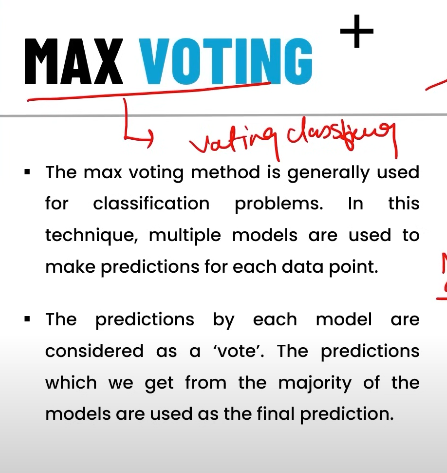

* suppose we have data of 10000
* and make train-8000 and test-2000
* Train multiple model on train data i.e on 8000
* Then when you give ne data then you will get multiple result (set of result)
* Then take mod on that result (max voting)
* 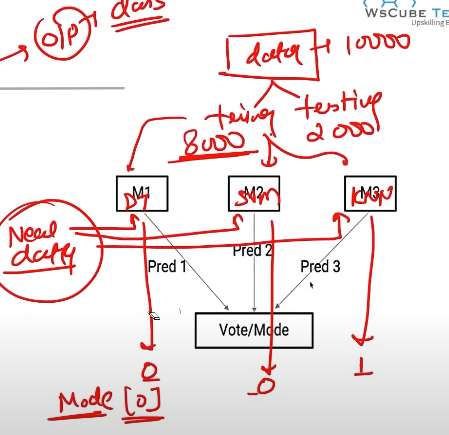

# Average voting   
Model used voting regressor
* Above we have talked when the data is of classification
* Now it the data is in the form of regression then you need to take average of those

* In the o/p of all the models we ill get defferent defferent answers
* like 20,19,21,20
* Then you will take avg of those and give it as a result

# Weighted Average voting
* If one model among then has high accuracy then obeously we need to give it a priority
* So we will assign some weight to it

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [15]:
x,y = make_moons(n_samples=1000, noise=0.2)

In [16]:
df = {'x1': x[:,0], 'x2': x[:,1], 'y':y }

In [17]:
data = pd.DataFrame(df)

<Axes: xlabel='x1', ylabel='x2'>

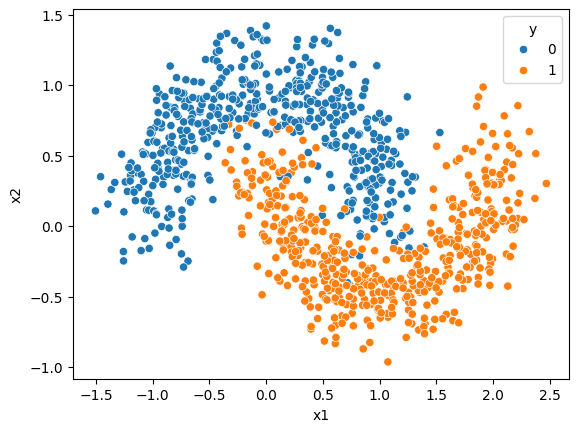

In [18]:
sns.scatterplot(x='x1', y='x2', hue='y', data=data)

This is of classification data

In [19]:
x_a = data.iloc[:,:-1]
y_a = data['y']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train , x_test, y_train , y_test = train_test_split(x,y, train_size=0.8, random_state=42)

Now we will train our model on different different model and see the accuracy and increase it through max_voting

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [26]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_train, y_train), dt.score(x_test, y_test)

(1.0, 0.955)

In [27]:
sv = SVC()
sv.fit(x_train, y_train)
sv.score(x_train, y_train),sv.score(x_test, y_test)

(0.96, 0.985)

In [28]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_train, y_train),sv.score(x_test, y_test)

(0.85875, 0.985)

We want more accuracy

In [29]:
from sklearn.ensemble import VotingClassifier

In [33]:
li = [('dt1', DecisionTreeClassifier()), ('sv1', SVC()), ('gnb1', GaussianNB())]

In [34]:
vc = VotingClassifier(li)
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())])

In [35]:
vc.score(x_train, y_train), vc.score(x_test, y_test)

(0.97125, 0.985)

More accuracy and no overffting  
To increase more change the hp, also can give weights

In [40]:
prd = {'dt': dt.predict(x_test), 'svc':sv.predict(x_test), 'gnb':gnb.predict(x_test), 'vc':vc.predict(x_test)}

In [41]:
pd.DataFrame(prd)

,dt,svc,gnb,vc
0,1,1,1,1
1,1,1,1,1
2,1,1,0,1
3,0,0,0,0
4,1,1,0,1
...,...,...,...,...
195,0,0,0,0
196,0,0,0,0
197,1,1,1,1
198,0,0,0,0


You can see it is taking mod of answers

# Avg and wighted

In [42]:
import pandas as pd

In [43]:
dataset = pd.read_csv(r"D:\Data Science\Datasets\placement.csv")
dataset.head(3)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25


This is regression dataset

In [53]:
x1 = dataset.iloc[:,:-1]
y1 = dataset['package']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train1 , x_test1, y_train1 , y_test1 = train_test_split(x1,y1, train_size=0.8, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [62]:
lr = LinearRegression()
lr.fit(x_train1, y_train1)
lr.score(x_train1, y_train1), lr.score(x_test1,y_test1)

(0.7758339025733345, 0.7730984312051673)

In [66]:
dt = DecisionTreeRegressor()
dt.fit(x_train1, y_train1)
dt.score(x_train1, y_train1), dt.score(x_test1,y_test1)

(0.9515592009554319, 0.5219733481708333)

In [64]:
svr = SVR()
svr.fit(x_train1, y_train1)
svr.score(x_train1, y_train1), svr.score(x_test1,y_test1)

(0.7816909319813372, 0.7594945442913416)

In [67]:
from sklearn.ensemble import VotingRegressor

In [70]:
lis= [('lr', LinearRegression()), ('dt', DecisionTreeRegressor()), ('svr', SVR())]

In [72]:
vr = VotingRegressor(lis)
vr.fit(x_train1, y_train1)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor()), ('svr', SVR())])

In [73]:
vr.score(x_train1, y_train1), vr.score(x_test1, y_test1)

(0.8756852979319457, 0.7516568331690885)

Model is overfitting  
Change weightage